In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive')

In [0]:
Aligned Face Dataset from Pinterest.zip

In [9]:
!unzip 'Aligned Face Dataset from Pinterest.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner71_1751.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turn

In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [0]:
from google.colab.patches import cv2_imshow

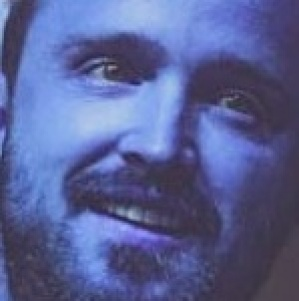

In [18]:
cv2_imshow(load_image('/content/drive/My Drive/pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'))

In [19]:
load_image('/content/drive/My Drive/pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    #model.add(Flatten())
    #model.add(Activation('softmax'))
    return model

In [0]:
model = vgg_face()

In [0]:
model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.output)

In [25]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(1, 1, 2622)


In [78]:
embedding_vector

array([[[ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
          0.00219081, -0.00908097]]], dtype=float32)

In [77]:
embedding_vector.reshape(2622)

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

In [0]:
import re
labels=[]
for image in metadata:
  img_path = image.image_path()
  img = load_image(img_path)
  result = re.search('PINS/(.*)/', img_path)
  labels.append(result.group(1))

In [49]:
labels

['pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',
 'pins_Aaron Paul',


In [0]:
embeddings=[]
for image in metadata:
  img_path = image.image_path()
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embeddings.append(vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0].reshape(2622))

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

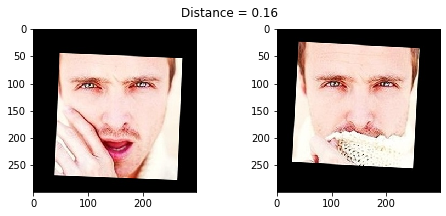

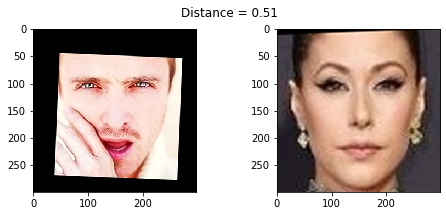

In [80]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(labels)

train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [0]:
from itertools import compress

In [0]:
X_train=list(compress(embeddings, train_idx))
y_train=list(compress(Y, train_idx))
X_test=list(compress(embeddings, test_idx))
y_test=list(compress(Y, test_idx))

In [83]:
np.array(embeddings).shape

(10770, 2622)

In [0]:
y_train

In [0]:
X_train

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

#X_train_scaled=(X_train-np.mean(X_train))/np.std(X_train)
#X_test_scaled=(X_test-np.mean(X_test))/np.std(X_test)
#### Add your code here ####

In [86]:
X_train_scaled.shape

(9573, 2622)

In [0]:
from sklearn.decomposition import PCA
faces_pca = PCA(n_components=0.95)
X_train_PCA=faces_pca.fit_transform(X_train_scaled)

In [0]:
X_test_PCA=faces_pca.transform(X_test_scaled)

In [116]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_PCA,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
svc.score(X_train_PCA,y_train)

0.9972840279954037

In [118]:
svc.score(X_test_PCA,y_test)

0.960735171261487

PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


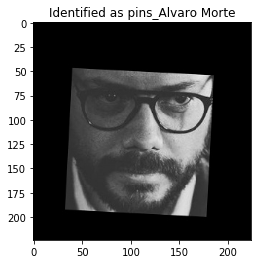

In [124]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
print(metadata[test_idx][example_idx].image_path())
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image = (example_image / 255.).astype(np.float32)
example_image = cv2.resize(example_image, dsize = (224,224))
embTest=vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0].reshape(2622)
embTestScaled=stats.zscore(embTest)
embTestScaledPCA=faces_pca.transform([embTestScaled])
example_prediction = svc.predict(embTestScaledPCA)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');